# P3

In [56]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al aplicar el método de interpolación por mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$


En caso de la ecuación de segundo grado:
$  f(x) = a x^2+ b x+c $

se obtiene 
$ ( \sum (y_i - a x_i^2 - b x_i -c ) ( x_i^2) ,  \sum (y_i - a x_i^2 - b x_i  -c) ( x_i), \sum (y_i - a x_i^2 - b x_i  -c )  ) = 0 $


In [57]:
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    n = len(xs)
    sum_x = sum(xs)
    sum_x2 = sum(x**2 for x in xs)
    sum_xy = sum(x * y for x, y in zip(xs, ys))
    sum_y = sum(ys)
    
    # Coeficientes para la ecuación parcial respecto a a_1
    c_1 = sum_x2
    c_0 = sum_x
    c_ind = sum_xy

    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    n = len(xs)
    sum_x = sum(xs)
    sum_y = sum(ys)
    
    # Coeficientes para la ecuación parcial respecto a a_0
    c_1 = sum_x
    c_0 = n
    c_ind = sum_y

    return (c_1, c_0, c_ind)


## Conjunto de datos 1

In [58]:
xs = [
    1.1715,
    1.3396,
    1.4163,
    1.9962,
    2.2523,
    2.2947,
    2.5793,
    2.7054,
    2.7635,
    2.8200,
    3.0317,
    3.5111,
    3.5393,
    3.9829,
    4.0323,
    4.1353,
    4.2084,
    4.4683,
    4.6509,
    4.7489,
]


ys = [
    1.1902,
    0.9564,
    0.6078,
    -0.0856,
    -0.3550,
    0.1355,
    -0.3171,
    -0.3425,
    -0.3758,
    -0.1518,
    -0.2767,
    0.6251,
    0.6447,
    2.2733,
    2.1789,
    2.6781,
    2.3818,
    3.3786,
    4.4971,
    5.1431,
]

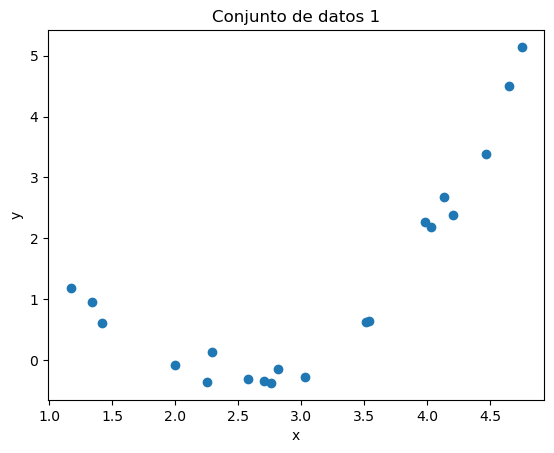

In [59]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [60]:
%autoreload 2
from src import ajustar_min_cuadrados
# Descomentar para probar la función

# pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
# pars # parámetros de la curva ajustada

In [61]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

In [62]:
# ####################################################################
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(x * y for x, y in zip(xs, ys))
    return (c_1, c_0, c_ind)


# ####################################################################
def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(x**2 * y for x, y in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

In [63]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [64]:
# pars_cuad = ajustar_min_cuadrados(
#     xs,
#     ys,
#    gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol],
# )
# print(pars_cuad)

## IMPLEMENTACION COMPLETA

Promedio del error relativo (línea): 1.8949
Promedio del error relativo (cuadrática): 0.3787


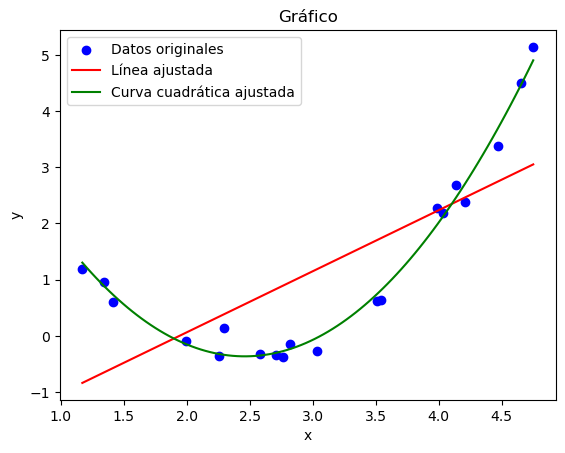

In [71]:
import matplotlib.pyplot as plt
import numpy as np

xs = [
    1.1715, 1.3396, 1.4163, 1.9962, 2.2523, 2.2947, 2.5793, 2.7054,
    2.7635, 2.8200, 3.0317, 3.5111, 3.5393, 3.9829, 4.0323, 4.1353,
    4.2084, 4.4683, 4.6509, 4.7489
]

ys = [
    1.1902, 0.9564, 0.6078, -0.0856, -0.3550, 0.1355, -0.3171, -0.3425,
    -0.3758, -0.1518, -0.2767, 0.6251, 0.6447, 2.2733, 2.1789, 2.6781,
    2.3818, 3.3786, 4.4971, 5.1431
]

def ajustar_min_cuadrados(xs, ys, gradiente):
    A = []
    b = []
    for g in gradiente:
        c = g(xs, ys)
        A.append(c[:-1])
        b.append(c[-1])
    pars = np.linalg.solve(A, b)
    return pars

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(x * y for x, y in zip(xs, ys))
    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_1, c_0, c_ind)

pars_linea = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x_range = np.linspace(min(xs), max(xs), 100)
y_linea = [linea(x, pars_linea) for x in x_range]

plt.scatter(xs, ys, color='blue', label='Datos originales')
plt.plot(x_range, y_linea, color='red', label='Línea ajustada')

def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(x**2 * y for x, y in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(x * y for x, y in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def linea(x: float, pars: tuple[float]) -> float:
    a1, a0 = pars
    return a1 * x + a0

def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

def error_relativo_promedio(xs: list, ys: list, f) -> float:
    errores_relativos = []
    
    for x, y in zip(xs, ys):
        y_est = f(x)
        if y != 0:
            error_rel = abs((y_est - y) / y)
            errores_relativos.append(error_rel)
        else:
            errores_relativos.append(float('inf'))  # Evita división por cero
    
    promedio_error_relativo = sum(errores_relativos) / len(errores_relativos)
    return promedio_error_relativo

# Ajuste para la línea recta
pars_linea = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

# Ajuste para la cuadrática
pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol]
)

error_linea = error_relativo_promedio(xs, ys, lambda x: linea(x, pars_linea))
error_cuad = error_relativo_promedio(xs, ys, lambda x: cuadratica(x, pars_cuad))

print(f"Promedio del error relativo (línea): {error_linea:.4f}")
print(f"Promedio del error relativo (cuadrática): {error_cuad:.4f}")

pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol],
)

y_cuad = [cuadratica(x, pars_cuad) for x in x_range]
plt.plot(x_range, y_cuad, color='green', label='Curva cuadrática ajustada')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gráfico')

plt.show()

Su imagen debe ser similar a:

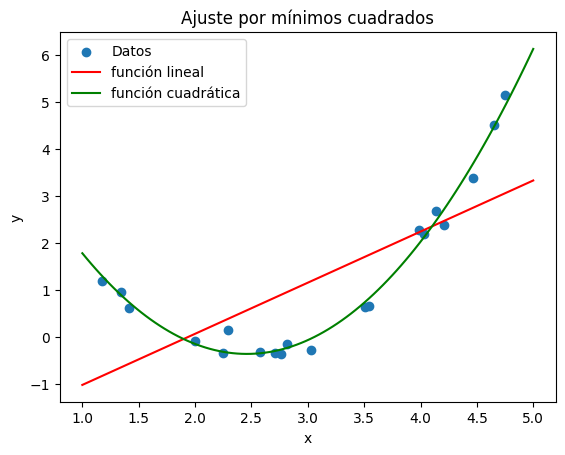

# Indicaciones
Su trabajo es ajustar el código para utilizar una función lineal y una cuadrática que aproxime los puntos. Tenga en cuenta las siguientes consideraciones:
* Usar el método de mínimos cuadrados para interpolar los puntos.
* Graficar la función cuadrática y los puntos dados.
* Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.